# Equity Analysis with Python - Introduction (Part 1)

__Please install yfinance__ with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance

## yfinance API - first steps

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [ ]:
df = yf.download(tickers = symbol, interval = "1d")
df

In [ ]:
df.index = pd.to_datetime(df.index.date)
df

In [ ]:
df.index

In [ ]:
df.info()

- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

In [ ]:
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

In [ ]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [ ]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

## Excursus: Versions and Updates

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index.
To avoid this, set multi_level_index=False

In [ ]:
yf.download(tickers = symbol) # creates a Multi Level Index (from yfinance 0.2.48)

In [ ]:
yf.download(tickers = symbol, multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)

You can get the __latest version__ of yfinance with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance --upgrade

In [ ]:
yf.__version__

## Analysis Period

In [ ]:
df

In [ ]:
df.loc["2022-01-01":"2022-01-15"]

In [ ]:
df.loc["2022"]

In [ ]:
df.loc["2017":]

In [ ]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [ ]:
df = yf.download(tickers = symbol, period = "1mo") # last 30 days
df

In [ ]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

In [ ]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

In [ ]:
df = yf.download(tickers = symbol, period = "max") # max
df

## Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [ ]:
df = yf.download(tickers = symbol, interval = "1d")
df

__monthly__

In [ ]:
df = yf.download(tickers = symbol, interval = "1mo")
df

__weekly__

In [ ]:
df = yf.download(tickers = symbol, interval = "1wk")
df

__intraday - 1h__

In [ ]:
#df = yf.download(tickers = symbol, interval = "1h")
#df

In [ ]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

__intraday - 1m__

In [ ]:
#df = yf.download(tickers = symbol, period = "1y", interval = "1m")
#df

In [ ]:
# df = yf.download(tickers = symbol, period = "1wk", interval = "1m") # old (1wk deprecated) 
# df

In [ ]:
df = yf.download(tickers = symbol, period = "5d", interval = "1m") # new (use 5d instead)
df

## Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [ ]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

In [ ]:
# option 2 -> max period
# df = yf.download(tickers = symbol, actions = True) 
# df

In [ ]:
df.loc[df.Dividends != 0]

In [ ]:
df.Dividends.sum() # cumulative Dividends per share

In [ ]:
# df.Close[-1] - df.Close[0] # cumulative Stock Price Increase - OLD

In [ ]:
df.Close.iloc[-1] - df.Close.iloc[0] # cumulative Stock Price Increase - NEW

In [ ]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

## What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [ ]:
df

In [ ]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

In [ ]:
df2.loc["2015":].plot(figsize = (12, 8), secondary_y = "Dividends")
plt.show()

In [ ]:
df2[df2.Dividends > 0]

In [ ]:
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

In [ ]:
last_div.Close - last_div["Adj Close"]

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

In [ ]:
multiplier = (1 - 0.23/165.809998)
multiplier

In [ ]:
last_div

In [ ]:
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

In [ ]:
df["Adj Close"] / df["Close"] # total multiplier (all dividends)

In [ ]:
df

__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

## Stock Splits

In [ ]:
df

All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [ ]:
splits = df.loc[df["Stock Splits"] > 0]
splits

__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [ ]:
splits.loc["2020-08-31", "Close"] 

Price on 2020-08-31 __before Split__:

In [ ]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

__-> 4 * 129 == 1 * 516__

__Calculate the unadjusted (observable) prices__

In [ ]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

In [ ]:
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() # cumulative multipier
df

In [ ]:
df["Close_unadj"] = df["Close"] * df.Multiplier # observable close price
df

In [ ]:
df[["Close", "Close_unadj"]].plot(figsize = (12 ,8))
plt.vlines(splits.index, 0, 700, color = "black")
plt.show()

__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [ ]:
df["div_unadj"] = df["Dividends"] * df.Multiplier

In [ ]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

In [ ]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

In [ ]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

## Stocks from other Countries / Exchanges 

In [ ]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

In [ ]:
#yf.download(tickers = "RELIANCE") # Indian Ticker (no suffix)

__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [ ]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

In [ ]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

In [ ]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

## Multiple Tickers

In [ ]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.Close # outer index level

In [ ]:
df.loc[:, ("Close", "MSFT")] # one specific column

In [ ]:
df.Close.MSFT # one specific column

In [ ]:
df.loc[:, (slice(None), slice("AAPL"))] # inner index level

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

In [ ]:
df.AAPL

In [ ]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

In [ ]:
#df.LHA.F # incorrect

In [ ]:
df["LHA.F"]

In [ ]:
df.columns = ["LHA_DE", "LHA_F"]

In [ ]:
df

In [ ]:
df.LHA_F

## Saving and Loading Data (Local Files)

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
symbol = "AAPL"

In [ ]:
df = yf.download(symbol, multi_level_index = False) # use multi_level_index: this simplifies the next steps
df

In [ ]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [ ]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

In [ ]:
df2.info()

__multiple symbols__

In [ ]:
symbols = ["AAPL", "MSFT"]

In [ ]:
df = yf.download(symbols)
df

In [ ]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [ ]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

In [ ]:
df2.info()

## Coding Challenge

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

## --------------- Solution --------------------------

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
ticker = ["JNJ","TSLA"]
df = yf.download(ticker)
df.head()


[*********************100%***********************]  2 of 2 completed


Price      Adj Close          Close           High            Low      Open  \
Ticker           JNJ TSLA       JNJ TSLA       JNJ TSLA       JNJ TSLA  JNJ   
Date                                                                          
1962-01-02  0.062519  NaN  0.223380  NaN  0.223380  NaN  0.222222  NaN  0.0   
1962-01-03  0.061547  NaN  0.219907  NaN  0.221065  NaN  0.219907  NaN  0.0   
1962-01-04  0.060899  NaN  0.217593  NaN  0.221065  NaN  0.217593  NaN  0.0   
1962-01-05  0.059927  NaN  0.214120  NaN  0.215856  NaN  0.214120  NaN  0.0   
1962-01-08  0.058956  NaN  0.210648  NaN  0.212384  NaN  0.210648  NaN  0.0   

Price            Volume       
Ticker     TSLA     JNJ TSLA  
Date                          
1962-01-02  NaN       0  NaN  
1962-01-03  NaN  345600  NaN  
1962-01-04  NaN  216000  NaN  
1962-01-05  NaN  129600  NaN  
1962-01-08  NaN  172800  NaN

In [ ]:
adj_close = df.loc[:, 'Adj Close'].copy()
adj_close

Ticker,JNJ,TSLA
Date,,
1962-01-02,0.062519,NaN
1962-01-03,0.061547,NaN
1962-01-04,0.060899,NaN
1962-01-05,0.059927,NaN
1962-01-08,0.058956,NaN
...,...,...
2024-12-20,144.470001,421.059998
2024-12-23,145.270004,430.600006
2024-12-24,145.850006,462.279999


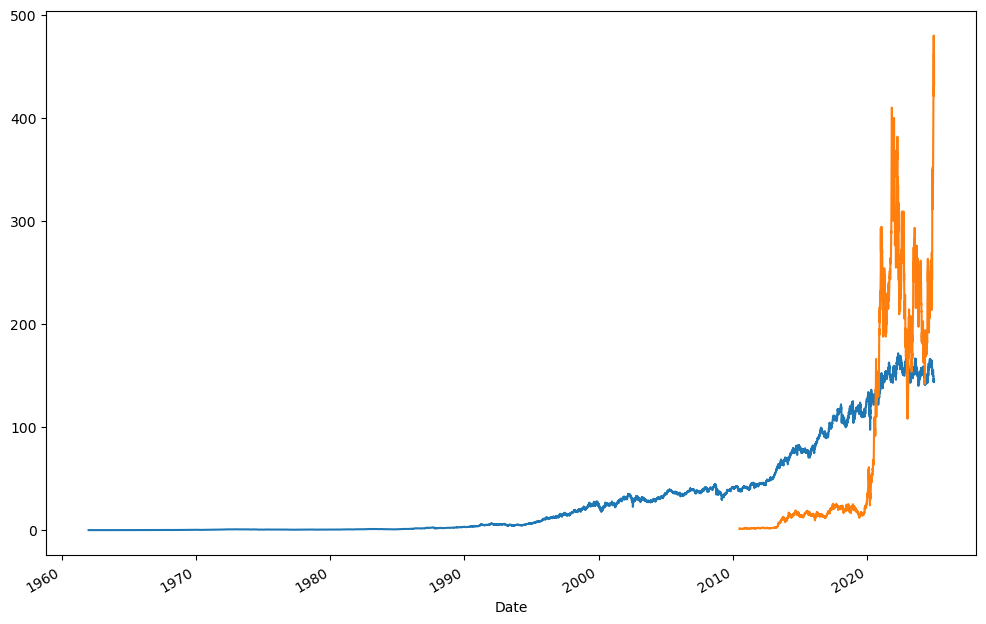

In [18]:
import matplotlib.pyplot as plt    
plt.figure(figsize=(12, 8))
for i in adj_close.columns:
    adj_close[i].plot()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
symbols = ["JNJ", "TSLA"]

In [ ]:
df = yf.download(symbols, actions = True)
df

In [ ]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

In [ ]:
jnj = df.JNJ
jnj

In [ ]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
jnj.Dividends.sum()

__Price Increase__

In [ ]:
jnj.Close.iloc[-1] - jnj.Close.iloc[0] # from Pandas v. 2.0 use iloc!

__Dividend Policy__

In [ ]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [ ]:
tsla = df.TSLA.dropna()
tsla

In [ ]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
tsla.Dividends.sum()

__Price Increase__

In [ ]:
tsla.Close.iloc[-1] - tsla.Close.iloc[0]

__Dividend Policy__

In [ ]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__